In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
NETWORK_SIZE=100
MAX_ITER=600
import const
from swarm import Swarm

In [10]:
results = {}
fracs = [0.05, 0.1, 0.2]
for frac in fracs:
    swarm = Swarm(NETWORK_SIZE, attacker_frac=frac)
    
    # itermediate values
    iterations = []
    percentages = []
    
    for i in range(MAX_ITER):
        swarm.iteration()
        if i % 50 == 0:
            iterations.append(i)
            percentages.append(int(swarm.report() * 100))
    results[frac] = (iterations, percentages)
    
    

AttributeError: 'Figure' object has no attribute 'save'

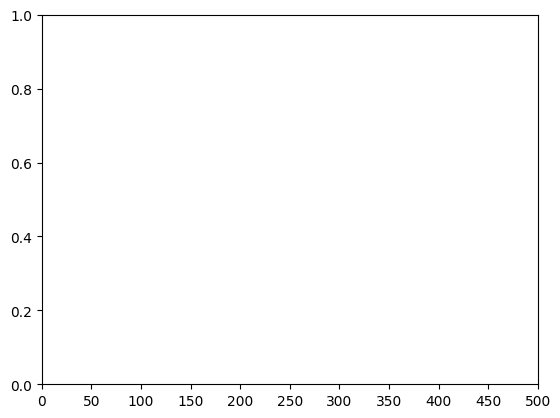

In [19]:
#
color_idx=0
colors = ['blue', 'black', 'red']
for frac, (iterations, percentages) in results.items():
    ax.plot(iterations, percentages, color=colors[color_idx], )
    color_idx += 1

ax.set(xlabel='Number of iterations', ylabel='Fraction of malicious nodes [%]',
       title=f'A network size of {NETWORK_SIZE}')
ax.grid()
ax.set_xlim([0, 500])
plt.xticks([x for x in range(501) if x % 50 == 0])
ax.set_ylim([0, 100])

fig.save(f"guardedgossip_results_{NETWORK_SIZE}.png")
plt.show()